In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.8.0'

Importação base de dados


In [ ]:
bike = pd.read_csv("MLs06a bike_sharing_daily.csv")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Etapa 3: Limpeza da base de dados

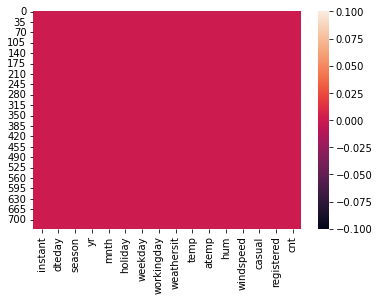

In [ ]:
sns.heatmap(bike.isnull())

In [ ]:
bike = bike.drop(labels=['instant'], axis=1)

In [ ]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bike = bike.drop(labels=['casual',  'registered'], axis=1)

In [ ]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
bike.dteday = pd.to_datetime(bike.dteday, format = '%Y-%m-%d')

In [ ]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [ ]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
bike = bike.drop(labels=['dteday'], axis=1)

In [ ]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Etapa 4: Visualizção da base de dados

Text(0, 0.5, 'Bike rental')

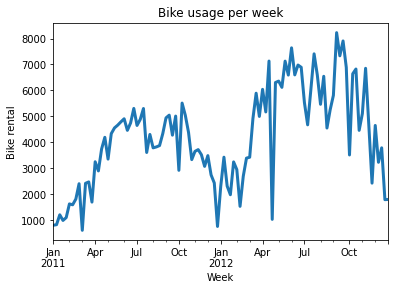

In [ ]:
bike['cnt'].asfreq('W').plot(linewidth=3)
plt.title("Bike usage per week")
plt.xlabel("Week")
plt.ylabel("Bike rental")

Text(0, 0.5, 'Bike rental')

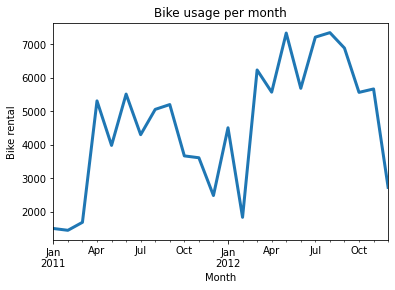

In [ ]:
bike['cnt'].asfreq('M').plot(linewidth=3)
plt.title("Bike usage per month")
plt.xlabel("Month")
plt.ylabel("Bike rental")

Text(0, 0.5, 'Bike rental')

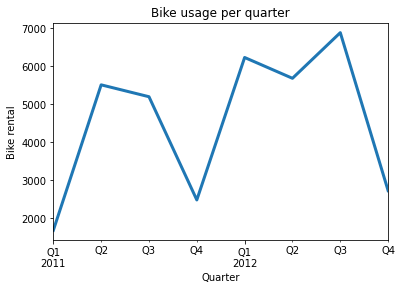

In [ ]:
bike['cnt'].asfreq('Q').plot(linewidth=3)
plt.title("Bike usage per quarter")
plt.xlabel("Quarter")
plt.ylabel("Bike rental")

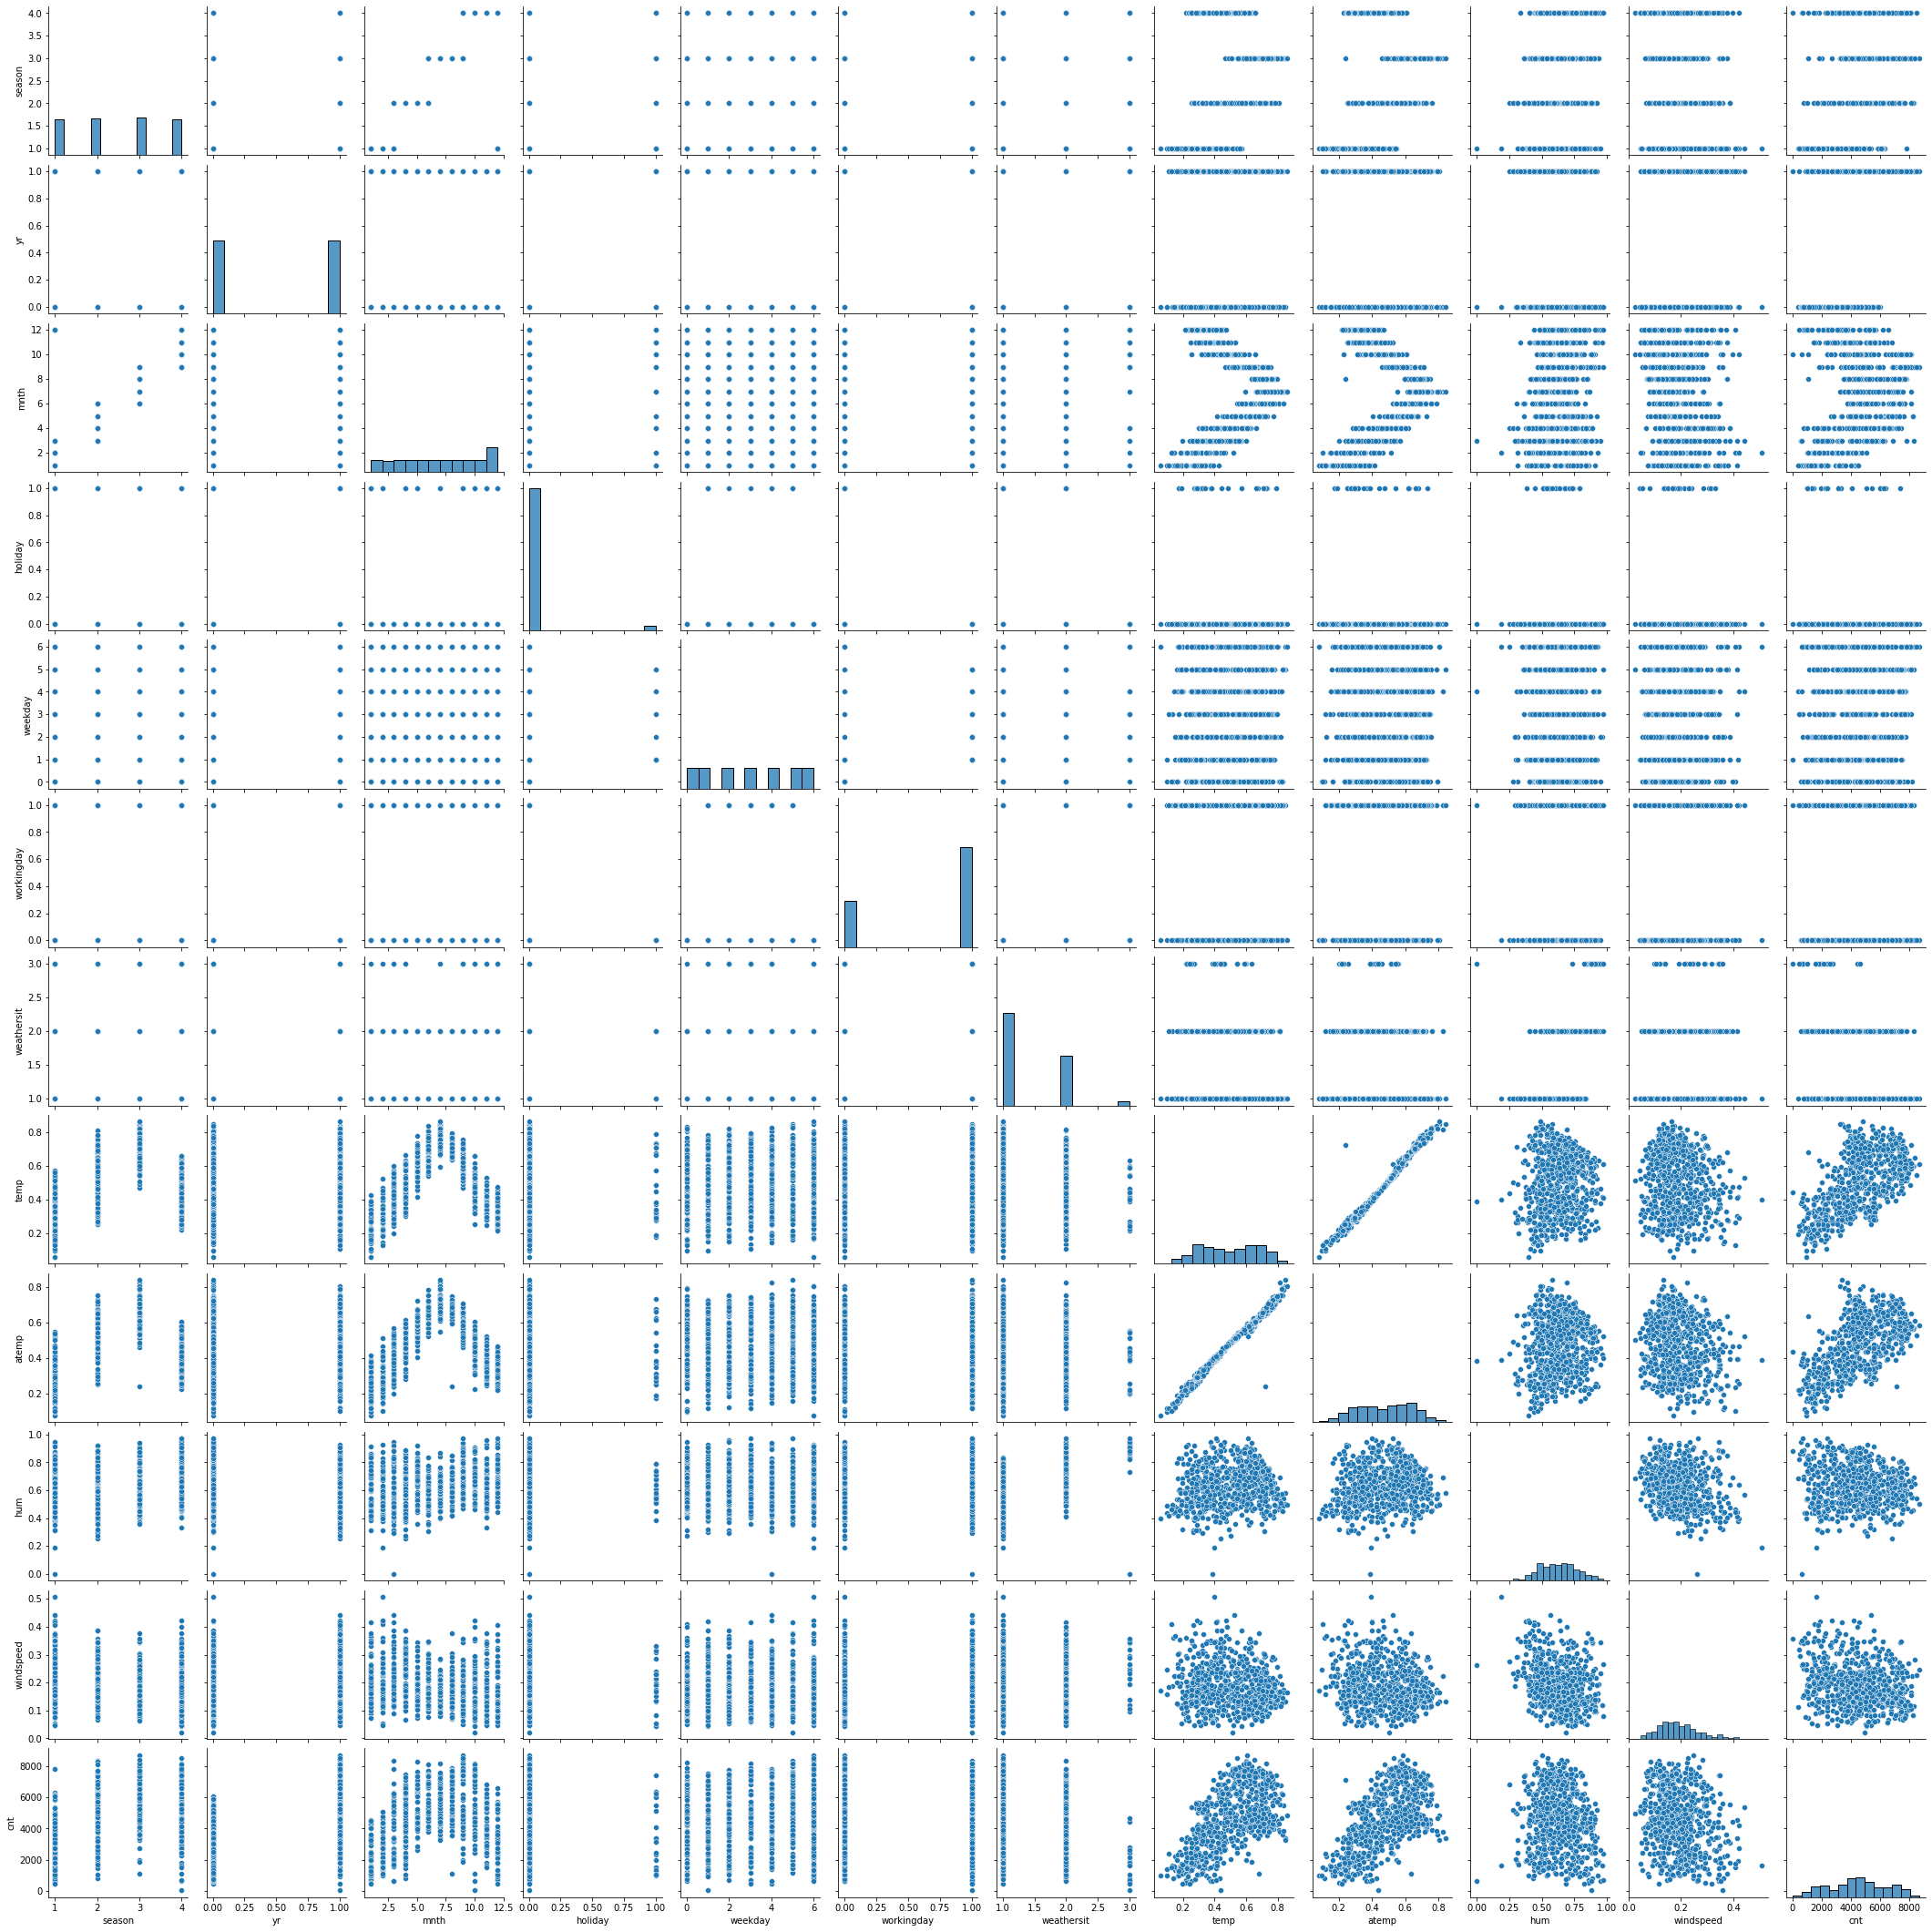

In [ ]:
sns.pairplot(bike)

In [ ]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


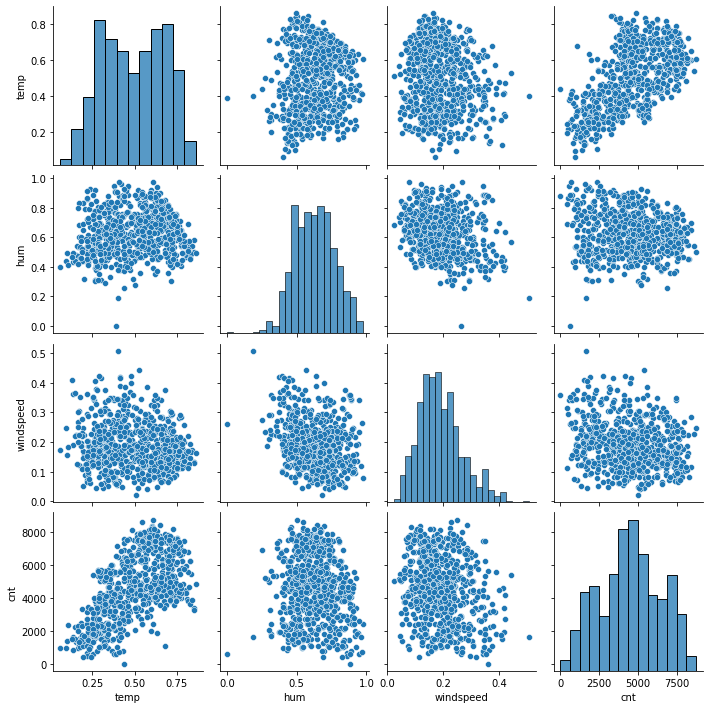

In [ ]:
sns.pairplot(X_numerical)

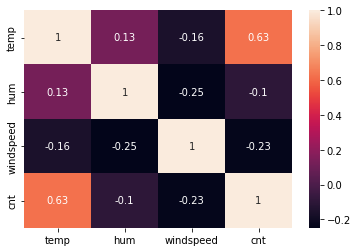

In [ ]:
sns.heatmap(X_numerical.corr(), annot=True) # Matrix de correlação, confusão

Etapa 5: Tratamento da base de dados

In [ ]:
X_Cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [ ]:
X_Cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


Domingo 0 Segunda 1 
Domingo 0 1 0 Segunda  1 0 0 Terça  0 0 1 


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_Cat = onehotencoder.fit_transform(X_Cat).toarray() 

In [ ]:
X_Cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
X_Cat.shape

(731, 32)

In [ ]:
X_Cat = pd.DataFrame(X_Cat)

In [ ]:
X_Cat

In [ ]:
X_numerical
X_numerical = X_numerical.reset_index()

In [ ]:
X_numerical

In [ ]:
X_all = pd.concat([X_Cat, X_numerical], axis = 1)

In [ ]:
X_all.head()

In [ ]:
X_all = X_all.drop(labels=['dteday'], axis=1)

In [ ]:
X_all

In [ ]:
X = X_all.iloc[:,:-1].values #Pega todos os valores menos o ultimo (cnt)

In [ ]:
Y = X_all.iloc[:,-1:].values #Pega apenas o ultimo valor (cnt)

In [ ]:
X.shape

(731, 35)

In [ ]:
Y.shape

(731, 1)

In [ ]:
X

In [ ]:
Y

In [ ]:
# normalizar o Y entre o e 1 = Base normalizada torna o processo de aprendizagem mais rápido
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y = scaler.fit_transform(Y)

In [ ]:
Y

In [ ]:
# Etapa 6 : Configuração da base de treinamento e teste
from sklearn.model_selection import train_test_split
SEED=5
np.random.seed(SEED)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) # 80% será base de treino

In [ ]:
X_train.shape

(584, 35)

In [ ]:
X_test.shape

(147, 35)

Etapa 7: Construção e treinamento do Modelo


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=[35]))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear',))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13,801
Trainable params: 13,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, Y_train, epochs=25, batch_size=100, validation_split=0.2)

Epoch 1/25
5/5 [==============================] - 1s 83ms/step - loss: 0.2468 - val_loss: 0.0677
Epoch 2/25
5/5 [==============================] - 0s 21ms/step - loss: 0.0789 - val_loss: 0.0853
Epoch 3/25
5/5 [==============================] - 0s 22ms/step - loss: 0.0670 - val_loss: 0.0318
Epoch 4/25
5/5 [==============================] - 0s 25ms/step - loss: 0.0229 - val_loss: 0.0186
Epoch 5/25
5/5 [==============================] - 0s 15ms/step - loss: 0.0233 - val_loss: 0.0185
Epoch 6/25
5/5 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0104
Epoch 7/25
5/5 [==============================] - 0s 19ms/step - loss: 0.0139 - val_loss: 0.0131
Epoch 8/25
5/5 [==============================] - 0s 25ms/step - loss: 0.0143 - val_loss: 0.0104
Epoch 9/25
5/5 [==============================] - 0s 19ms/step - loss: 0.0113 - val_loss: 0.0097
Epoch 10/25
5/5 [==============================] - 0s 23ms/step - loss: 0.0111 - val_loss: 0.0097
Epoch 11/25
5/5 [============

Etapa 8: Avaliação do Modelo

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training and Validation Loss')

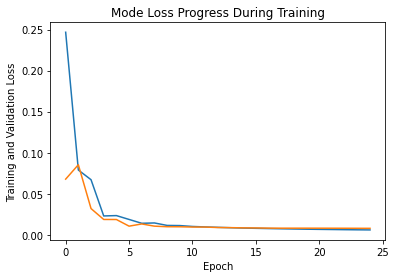

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Mode Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')

In [ ]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


In [ ]:
y_predict = model.predict(X_test)
y_predict

array([[0.8466086 ],
       [0.46588182],
       [0.9001521 ],
       [0.44914916],
       [0.41895688],
       [0.48508584],
       [0.63160104],
       [0.6571755 ],
       [0.21434918],
       [0.60213214],
       [0.30463365],
       [0.5977817 ],
       [0.54557854],
       [0.6115873 ],
       [0.6071653 ],
       [0.57826567],
       [0.4157335 ],
       [0.20446925],
       [0.8644439 ],
       [0.5437333 ],
       [0.23190537],
       [0.3526643 ],
       [0.20314391],
       [0.33506057],
       [0.52865386],
       [0.40802693],
       [0.7198116 ],
       [0.853997  ],
       [0.45036772],
       [0.60661   ],
       [0.77333647],
       [0.4432411 ],
       [0.2685654 ],
       [0.8073652 ],
       [0.7406608 ],
       [0.67361534],
       [0.22800276],
       [0.15815209],
       [0.7592732 ],
       [0.16142972],
       [0.21323615],
       [0.16847374],
       [0.79934865],
       [0.5178111 ],
       [0.510698  ],
       [0.50829375],
       [0.6366389 ],
       [0.594

Text(0, 0.5, 'True Values')

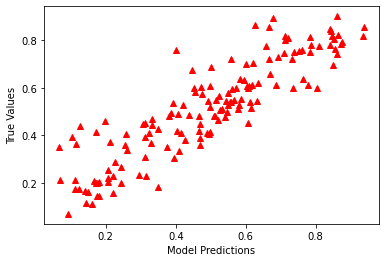

In [ ]:
plt.plot(Y_test, y_predict, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [ ]:
y_predict_orig =scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(Y_test)

Text(0, 0.5, 'True Values')

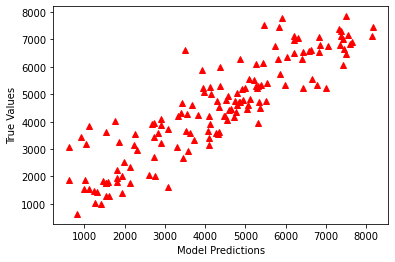

In [ ]:
plt.plot(y_test_orig, y_predict_orig, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [ ]:
k = X_test.shape[1]
k

35

In [ ]:
n = len(X_test)
n

147

In [ ]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mae

# Valor 0 = previsoes perfeitas

683.8502002119207

In [ ]:
r2 = r2_score(y_test_orig, y_predict_orig)
r2
#coeficiente de determinação regression score function
#fornece indicação de qualidade do modelo melhor é 1

0.782716561791467

In [ ]:
mse = mean_squared_error(y_test_orig, y_predict_orig)
mse
#Penaliza os outliers qua

841742.4421552238

In [ ]:
rmse = sqrt(mse)
rmse

917.465226673591

In [ ]:
mape = mean_absolute_percentage_error(y_test_orig, y_predict_orig)
mape

0.2692234064834884

In [ ]:
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - k - 1)
r2_ajustado
#R2_ajustado indica que existem variaveis "insignificantes".
# feature que tem pouco ganho na rede neural
# R_squared would penalyze you for adding features which are not useful for predicting

0.7142037659599476

In [ ]:
print(f'mae: {mae}\n r2:{r2}\nmse:{mse}\nrmse:{rmse}\nmape:{mape}\nr2_ajustado:{r2_ajustado}')

mae: 683.8502002119207
 r2:0.782716561791467
mse:841742.4421552238
rmse:917.465226673591
mape:0.2692234064834884
r2_ajustado:0.7142037659599476
